## 库及预设函数

In [1]:
import pandas as pd
import numpy as np

from WindPy import w
w.start()
w.isconnected()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [2]:
def weighted_average(series, weights):
    # 获取非空值的索引
    non_nan_indices = series.notna()
    # 剔除空值后的数据和权重
    filtered_series = series[non_nan_indices]
    filtered_weights = np.array(weights)[non_nan_indices]
    # 计算加权平均
    return (filtered_series * filtered_weights).sum() / filtered_weights.sum()

In [3]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 全局设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def draw_bar(df, x_name, y_name):

    plt.figure(figsize=(10, 6))
    plt.bar(df[x_name], df[y_name], color='blue')

    plt.xticks(rotation=75)

    plt.title(f'{y_name} by {x_name}')
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    plt.show()

In [4]:
from pyecharts.charts import Map
from pyecharts import options as opts
from pyecharts.globals import ChartType
import heapq

def Heatmap_China(data, name, col_sum, row_date):

    df = data.drop(col_sum, axis=1).T
    df.columns = df.columns.map(str)
    data_list = [(index, row[row_date]) for index, row in df.iterrows()]
    values = [value for _, value in data_list]
    min_value = min(values)
    max_value = max(values)
    
    min_value = heapq.nsmallest(2, values)[-1]  # 获取第二小的值
    max_value = heapq.nlargest(2, values)[-2]  # 获取第二大的值

    map = Map()     # 创建地图对象
    map.add(name, data_list, "china")    # 添加数据

    map.set_global_opts(
        title_opts=opts.TitleOpts(title=f"中国{name}热力图"),
        visualmap_opts=opts.VisualMapOpts(min_= min_value, max_=max_value, is_piecewise=False)  # 设置视觉映射最大值
    )
    return map.render_notebook() # 渲染图表到Notebook中

## 各省份装机量

In [ ]:
#【总数不对】机组开发企业，新增容量，风电
codes = "U8987070,O6240506,C8113218,R4334052,Y8189240,U6928953,D0400908,Z9268361,Z6810427,U9488263,A7981943,W9419887,Y0860415,L5338332,X6473686,X6473202,Q3688435,R5956724,Y7986967"
names = "国电投,华能,中广核,国能,华电,三峡,华润,大唐,天润新能,电建,景台新能,洁源投资,山东能源,京能,协合,特变电工,河北建投,中节能,其他,"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2020-06-09", "2024-06-08","Fill=Previous", usedf=True)
data['汇总'] = data.sum(axis=1)
data.rename(columns=factors_dict, inplace=True)
#data.T

In [ ]:
#【省份不全】当年新增装机容量，太阳能
codes = "P9876250,R5070072,A5539555,F7413724,T7796888,F9067131,Y6969334,K0504124,U2149919,F6030609,N3493692,Y5043538,W3358415,Y1385228,K7022608,J8199814,Q9808699,J4082493,Z5109240,X6667583,Z2871677,K9832313,H3620476,L4381622,Q9806075"
names = "北京市,天津市,河北省,山西省,辽宁省,吉林省,黑龙江省,上海市,江苏省,浙江省,安徽省,福建省,江西省,山东省,河南省,湖北省,湖南省,重庆市,四川省,西藏自治区,陕西省,甘肃省,青海省,宁夏省,新疆维吾尔自治区,"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2020-06-09", "2024-06-08","Fill=Previous", usedf=True)
data['汇总'] = data.sum(axis=1)
data.rename(columns=factors_dict, inplace=True)
#data.T

In [ ]:
#【省份全,月更新，Wind】太阳能发电，装机容量，累计值
codes = "S5150404,S5150405,S5150406,S5150407,S5150408,S5150409,S5150410,S5150411,S5150412,S5150413,S5150414,S5150415,S5150416,S5150417,S5150418,S5150419,S5150420,S5150421,S5150422,S5150423,S5150424,S5150425,S5150426,S5150427,S5150428,S5150429,S5150430,S5150431,S5150432,S5150433,S5150434,S5150435"
names = "中国,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,浙江省,安徽省,福建省,江西省,山东省,河南省,湖北省,湖南省,广东省,广西壮族自治区,海南省,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2023-11-01", "2024-06-08","Fill=Previous", usedf=True)
data.rename(columns=factors_dict, inplace=True)
display(data.T)
Heatmap_China(data, "累计光伏装机容量", "中国", "2023-12-31")

In [ ]:
#【省份全,年更新，数据有偏差，没有最新】风电，新增装机容量，累计值
codes = "J6330926,D6316619,L1378640,V7060010,D5944350,X8572527,H5688672,B2740265,P9012803,C0062991,D9022044,Y2449988,V0737934,Z2039518,W8206427,L2869769,L2159758,N3340323,U3919370,C1553983,W0158765,Y5902317,Y9547485,B1251898,N0188372,W7256276,Q0654950,J4089291,C5064719,T6589479,R4638868"
names = "北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,浙江省,安徽省,福建省,江西省,山东省,河南省,湖北省,湖南省,广东省,广西壮族自治区,海南省,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2018-11-01", "2025-06-08", "Fill=Previous", usedf=True)
data.rename(columns=factors_dict, inplace=True)
data['汇总'] = data.sum(axis=1)
display(data.T)
Heatmap_China(data, "累计风电装机容量", "汇总", "2022-12-31")

## 各省份平均利用小时数

In [ ]:
#【省份全,月更新，Wind】风电，平均利用小时数，累计值
codes = "S5120201,S5132509,S5132510,S5132511,S5132512,S5132513,S5132514,S5132515,S5132516,S5132517,S5132518,S5132519,S5132520,S5132521,S5132522,S5132523,S5132524,S5132525,S5132526,S5132527,S5132528,S5132529,S5132530,S5132531,S5132532,S5132533,S5132534,S5132535,S5132536,S5132537,S5132538,S5132539"
names = "中国,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,浙江省,安徽省,福建省,江西省,山东省,河南省,湖北省,湖南省,广东省,广西壮族自治区,海南省,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2023-01-01", "2023-12-31","Fill=Previous", usedf=True)
data.rename(columns=factors_dict, inplace=True)
display(data.T)
Heatmap_China(data, "风力发电平均利用小时数", "中国", "2023-12-31")

In [ ]:
#【省份全,月更新，Wind】太阳能，平均利用小时数，累计值
codes = "S5150468,S5150469,S5150470,S5150471,S5150472,S5150473,S5150474,S5150475,S5150476,S5150477,S5150478,S5150479,S5150480,S5150481,S5150482,S5150483,S5150484,S5150485,S5150486,S5150487,S5150488,S5150489,S5150490,S5150491,S5150492,S5150493,S5150494,S5150495,S5150496,S5150497,S5150498,S5150499"
names = "中国,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,浙江省,安徽省,福建省,江西省,山东省,河南省,湖北省,湖南省,广东省,广西壮族自治区,海南省,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2022-12-31", "2023-11-30","Fill=Previous", usedf=True)
data.rename(columns=factors_dict, inplace=True)
display(data.T)
Heatmap_China(data, "光伏发电平均利用小时数", "中国", "2023-11-30")

## 各省份消纳率

In [ ]:
#【省份全,月更新，消纳预警中心】风电，利用率，累计值
codes = "C5359080,K9524822,Q9262467,J6754135,N2143859,T0705640,W9515201,K0999575,T3266683,A6417608,O4410323,F1866033,N3489795,N7420160,Q0171899,O1086710,J8576341,A2431750,J9357426,F5115448,D9682247,Q3784357,N1668798,P0069454,K5565205,Q7033864,R8521846,C9988392,A5032442,A0872715,W4777900,X8904624,P6085383"
names = "中国,北京市,天津市,河北省,山西省,山东省,蒙西,蒙东,辽宁省,吉林省,黑龙江省,上海市,江苏省,浙江省,安徽省,福建省,江西省,河南省,湖北省,湖南省,重庆市,四川省,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区,西藏自治区,广东省,广西壮族自治区,海南省,贵州省,云南省"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2022-12-31", "2023-12-31","Fill=Previous", usedf=True)
data.rename(columns=factors_dict, inplace=True)
data['内蒙古自治区'] = data[['蒙东', '蒙西']].mean(axis=1)
display(data.T)
Heatmap_China(data, "风力发电平均利用率", "中国", "2023-11-30")

In [ ]:
#【省份全,月更新，消纳预警中心】光伏，利用率，累计值
codes = "W8301930,Q3114775,J7836331,P7879589,N7277480,P4973256,F3122078,K4351103,U1509990,L1369639,X5857263,X4945838,J4183803,L7963035,P0343322,Q6662372,L6882499,B1678950,B1678952,F1866765,O1086104,N6102795,L1238714,A6956423,K2729851,K2729850,N6812330,T9758048,Y2438515,K2558081,U1206414,W8565691,F8360236"
names = "中国,北京市,天津市,河北省,山西省,山东省,蒙西,蒙东,辽宁省,吉林省,黑龙江省,上海市,江苏省,浙江省,安徽省,福建省,江西省,河南省,湖北省,湖南省,重庆市,四川省,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区,西藏自治区,广东省,广西壮族自治区,海南省,贵州省,云南省"
codes_list = codes.split(',')
names_list = names.split(',')
factors_dict = dict(zip(codes_list, names_list))

error, data = w.edb(codes, "2022-12-31", "2024-12-31","Fill=Previous", usedf=True)
data.rename(columns=factors_dict, inplace=True)
data['内蒙古自治区'] = data[['蒙东', '蒙西']].mean(axis=1)
display(data.T)
Heatmap_China(data, "光伏发电平均利用率", "中国", "2023-11-30")

### 消纳输入导入

In [17]:
data = pd.read_excel("4月消纳数据.xlsx")
data = data.set_index("地区")
data = data.multiply(100)
display(data)
#Heatmap_China(data.T, "光伏发电平均利用率（4月）", "全国", "光伏利用率：4 月")
Heatmap_China(data.T, "风力发电平均利用率（4月）", "全国", "风电利用率：4 月")

,风电利用率：4 月,风电利用率：1-4月,光伏利用率：4 月,光伏利用率：1-4月
地区,,,,
全国,96.10,96.1,97.1,95.3
北京市,98.60,97.7,99.8,99.4
天津市,99.90,99.2,99.7,98.5
河北省,94.90,93.2,97.1,94.4
山西省,99.90,98.5,99.9,97.5
山东省,98.50,95.6,99.3,97.5
蒙西,93.60,94.0,93.0,92.6
蒙东,91.90,92.8,96.6,97.4
内蒙古自治区,92.75,93.4,94.8,95.0


# 主营剥离

In [5]:
codes = "0579.HK, 0686.HK, 0836.HK, 0916.HK, 0958.HK, 1250.HK, 1713.HK, 1798.HK, 1811.HK, 2380.HK,\
000040.SZ, 000155.SZ, 000507.SZ, 000537.SZ, 000539.SZ, 000543.SZ, 000591.SZ, 000690.SZ, 000722.SZ, 000791.SZ,\
000862.SZ, 000875.SZ, 000883.SZ, 000899.SZ, 001258.SZ, 001289.SZ, 001896.SZ, 002015.SZ, 002053.SZ, 002128.SZ,\
002256.SZ, 002309.SZ, 002480.SZ, 002610.SZ, 002616.SZ, 002617.SZ, 003035.SZ, 003816.SZ, 300125.SZ, 300317.SZ, 301046.SZ,\
600025.SH, 600032.SH, 600098.SH, 600163.SH, 600212.SH, 600236.SH, 600310.SH, 600483.SH, 600578.SH, 600642.SH,\
600770.SH, 600821.SH, 600905.SH, 600956.SH, 600979.SH, 601016.SH, 601222.SH, 601619.SH, 601778.SH, 601908.SH,\
601985.SH, 603105.SH, 603628.SH, 603693.SH, 900957.SH"

error, data1 = w.wss(codes,"sec_name,tot_oper_rev,oper_rev,segment_product_item,segment_product_sales,segment_product_cost,segment_product_profit,segment_product_gpmargin", "rptDate=20231231;order=1;rptType=1", usedf=True)
error, data2 = w.wss(codes,"sec_name,tot_oper_rev,oper_rev,segment_product_item,segment_product_sales,segment_product_cost,segment_product_profit,segment_product_gpmargin", "rptDate=20231231;order=2;rptType=1", usedf=True)
error, data3 = w.wss(codes,"sec_name,tot_oper_rev,oper_rev,segment_product_item,segment_product_sales,segment_product_cost,segment_product_profit,segment_product_gpmargin", "rptDate=20231231;order=3;rptType=1", usedf=True)
error, data4 = w.wss(codes,"sec_name,tot_oper_rev,oper_rev,segment_product_item,segment_product_sales,segment_product_cost,segment_product_profit,segment_product_gpmargin", "rptDate=20231231;order=4;rptType=1", usedf=True)
error, data5 = w.wss(codes,"sec_name,tot_oper_rev,oper_rev,segment_product_item,segment_product_sales,segment_product_cost,segment_product_profit,segment_product_gpmargin", "rptDate=20231231;order=5;rptType=1", usedf=True)

pd.set_option('display.max_rows', None)
data = pd.concat([data1,data2,data3,data4,data5],axis=0).sort_index()
#data

In [6]:
def classify_business(row):
    if row['SEC_NAME'] == '川能动力' and row['SEGMENT_PRODUCT_ITEM'] == '风力及光伏发电收入':
        return 'PV+WP'
    elif row['SEC_NAME'] == '粤电力A' and row['SEGMENT_PRODUCT_ITEM'] == '可再生能源发电':
        return 'PV+WP'
    elif row['SEC_NAME'] == '皖能电力' and row['SEGMENT_PRODUCT_ITEM'] == '电力':
        return 'ALL'  ##火电为主  
    elif row['SEC_NAME'] == '太阳能' and row['SEGMENT_PRODUCT_ITEM'] == '太阳能电力销售':
        return 'PV'   
    elif row['SEC_NAME'] == '甘肃能源' and row['SEGMENT_PRODUCT_ITEM'] == '风电产品':
        return 'WP'
    elif row['SEC_NAME'] == '甘肃能源' and row['SEGMENT_PRODUCT_ITEM'] == '光伏产品':
        return 'PV'   
    elif row['SEC_NAME'] == '吉电股份' and row['SEGMENT_PRODUCT_ITEM'] == '风电产品':
        return 'WP'
    elif row['SEC_NAME'] == '吉电股份' and row['SEGMENT_PRODUCT_ITEM'] == '光伏产品':
        return 'PV'    
    elif row['SEC_NAME'] == '湖北能源' and row['SEGMENT_PRODUCT_ITEM'] == '电力':
        return 'ALL'  ##新能源约占40% 
    elif row['SEC_NAME'] == '赣能股份' and row['SEGMENT_PRODUCT_ITEM'] == '光伏':
        return 'PV'
    elif row['SEC_NAME'] == '立新能源' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'   
    elif row['SEC_NAME'] == '立新能源' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电':
        return 'WP'
    elif row['SEC_NAME'] == '龙源电力' and row['SEGMENT_PRODUCT_ITEM'] == '电力产品':
        return 'WP' ##80%为风电 
    elif row['SEC_NAME'] == '豫能控股' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'   
    elif row['SEC_NAME'] == '豫能控股' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电':
        return 'WP'   
    elif row['SEC_NAME'] == '云南能投' and row['SEGMENT_PRODUCT_ITEM'] == '电':
        return 'WP' 
    elif row['SEC_NAME'] == '云南能投' and row['SEGMENT_PRODUCT_ITEM'] == '光伏':
        return 'PV'   
    elif row['SEC_NAME'] == '电投能源' and row['SEGMENT_PRODUCT_ITEM'] == '风电电力产品':
        return 'WP'
    elif row['SEC_NAME'] == '京能清洁能源' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电业务':
        return 'PV'   
    elif row['SEC_NAME'] == '京能清洁能源' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电及相关业务':
        return 'WP'
    elif row['SEC_NAME'] == '北京能源国际' and row['SEGMENT_PRODUCT_ITEM'] == '电力销售':
        return 'PV+WP'  ##60%为光伏 
    elif row['SEC_NAME'] == '华润电力' and row['SEGMENT_PRODUCT_ITEM'] == '可再生能源':
        return 'PV+WP'
    elif row['SEC_NAME'] == '山高新能源' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电业务':
        return 'PV'   
    elif row['SEC_NAME'] == '山高新能源' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电相关业务-电力销售及电价补贴':
        return 'WP'
    elif row['SEC_NAME'] == '四川能投发展' and row['SEGMENT_PRODUCT_ITEM'] == '一般供电业务':
        return 'ALL'   ##水电为主
    elif row['SEC_NAME'] == '大唐新能源' and row['SEGMENT_PRODUCT_ITEM'] == '电力销售':
        return 'PV+WP'
    elif row['SEC_NAME'] == '中国电力' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电业务':
        return 'PV'   
    elif row['SEC_NAME'] == '中国电力' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电及相关业务':
        return 'WP'   
    elif row['SEC_NAME'] == '浙江新能' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'   
    elif row['SEC_NAME'] == '浙江新能' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电':
        return 'WP'      
    elif row['SEC_NAME'] == '广州发展' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电':
        return 'WP'       
    elif row['SEC_NAME'] == '中闽能源' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'   
    elif row['SEC_NAME'] == '中闽能源' and row['SEGMENT_PRODUCT_ITEM'] == '风电':
        return 'WP'        
    elif row['SEC_NAME'] == '广西能源' and row['SEGMENT_PRODUCT_ITEM'] == '发电':
        return 'ALL'  ##水电和火电为主 
    elif row['SEC_NAME'] == '广西能源' and row['SEGMENT_PRODUCT_ITEM'] == '售电':
        return 'ALL' ##水电和火电为主        
    elif row['SEC_NAME'] == '福能股份' and row['SEGMENT_PRODUCT_ITEM'] == '供电':
        return 'ALL'   ##风电约占30%
    elif row['SEC_NAME'] == '京能电力' and row['SEGMENT_PRODUCT_ITEM'] == '电力':
        return 'ALL' ##火电为主       
    elif row['SEC_NAME'] == '申能股份' and row['SEGMENT_PRODUCT_ITEM'] == '风电业务':
        return 'WP'       
    elif row['SEC_NAME'] == '金开新能' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'      
    elif row['SEC_NAME'] == '金开新能' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电':
        return 'WP'       
    elif row['SEC_NAME'] == '三峡能源' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电业务':
        return 'PV'       
    elif row['SEC_NAME'] == '三峡能源' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电业务':
        return 'WP'       
    elif row['SEC_NAME'] == '新天绿能' and row['SEGMENT_PRODUCT_ITEM'] == '风电和光伏发电':
        return 'PV+WP'        
    elif row['SEC_NAME'] == '节能风电' and row['SEGMENT_PRODUCT_ITEM'] == '电力销售':
        return 'WP'       
    elif row['SEC_NAME'] == '嘉泽新能' and row['SEGMENT_PRODUCT_ITEM'] == '新能源电站运营及出售业务':
        return 'PV+WP' 
    elif row['SEC_NAME'] == '江苏新能' and row['SEGMENT_PRODUCT_ITEM'] == '太阳能发电':
        return 'PV'       
    elif row['SEC_NAME'] == '江苏新能' and row['SEGMENT_PRODUCT_ITEM'] == '风电':
        return 'WP' 
    elif row['SEC_NAME'] == '中绿电' and row['SEGMENT_PRODUCT_ITEM'] == '电力':
        return 'PV+WP' 
    elif row['SEC_NAME'] == '银星能源' and row['SEGMENT_PRODUCT_ITEM'] == '新能源发电':
        return 'PV+WP' 
    elif row['SEC_NAME'] == '协鑫能科' and row['SEGMENT_PRODUCT_ITEM'] == '电力销售':
        return 'ALL'  ##风电+光伏约占40%
    elif row['SEC_NAME'] == '兆新股份' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV' 
    elif row['SEC_NAME'] == '中国广核' and row['SEGMENT_PRODUCT_ITEM'] == '销售电力':
        return 'ALL' ##不涉及新能源发电
    elif row['SEC_NAME'] == 'ST聆达' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV' 
    elif row['SEC_NAME'] == '珈伟新能' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电收入':
        return 'PV' 
    elif row['SEC_NAME'] == '能辉科技' and row['SEGMENT_PRODUCT_ITEM'] == '电站运营':
        return 'PV' 
    elif row['SEC_NAME'] == '晶科科技' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电业务':
        return 'PV' 
    elif row['SEC_NAME'] == '中国核电' and row['SEGMENT_PRODUCT_ITEM'] == '光伏':
        return 'PV' 
    elif row['SEC_NAME'] == '中国核电' and row['SEGMENT_PRODUCT_ITEM'] == '风电':
        return 'WP' 
    elif row['SEC_NAME'] == '芯能科技' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV' 
    elif row['SEC_NAME'] == '清源股份' and row['SEGMENT_PRODUCT_ITEM'] == '光伏电站发电':
        return 'PV' 
    elif row['SEC_NAME'] == '宝新能源' and row['SEGMENT_PRODUCT_ITEM'] == '风电':
        return 'WP' 
    elif row['SEC_NAME'] == 'ST爱康' and row['SEGMENT_PRODUCT_ITEM'] == '电力销售':
        return 'PV'
    elif row['SEC_NAME'] == '长青集团' and row['SEGMENT_PRODUCT_ITEM'] == '供电':
        return 'ALL'##生物质发电为主
    elif row['SEC_NAME'] == '南网能源' and row['SEGMENT_PRODUCT_ITEM'] == '分布式光伏':
        return 'PV'
    elif row['SEC_NAME'] == '凌云B股' and row['SEGMENT_PRODUCT_ITEM'] == '电力销售':
        return 'PV'
    elif row['SEC_NAME'] == '华能水电' and row['SEGMENT_PRODUCT_ITEM'] == '太阳能光伏发电':
        return 'PV'
    elif row['SEC_NAME'] == '华能水电' and row['SEGMENT_PRODUCT_ITEM'] == '风力发电':
        return 'WP'
    elif row['SEC_NAME'] == '综艺股份' and row['SEGMENT_PRODUCT_ITEM'] == '太阳能电站':
        return 'PV'
    elif row['SEC_NAME'] == '桂冠电力' and row['SEGMENT_PRODUCT_ITEM'] == '电力':
        return 'ALL'##水电为主
    elif row['SEC_NAME'] == '广安爱众' and row['SEGMENT_PRODUCT_ITEM'] == '电力':
        return 'ALL'  ##水电为主
    elif row['SEC_NAME'] == '新筑股份' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'
    elif row['SEC_NAME'] == '露笑科技' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'
    elif row['SEC_NAME'] == '林洋能源' and row['SEGMENT_PRODUCT_ITEM'] == '光伏发电':
        return 'PV'
    elif row['SEC_NAME'] == '京运通' and row['SEGMENT_PRODUCT_ITEM'] == '电力':
        return 'PV+WP'
    elif row['SEC_NAME'] == '珠海港' and row['SEGMENT_PRODUCT_ITEM'] == '新能源板块':
        return 'WP'
    
    else:
        return ''

In [7]:
data['BUSINESS_RATIO'] = data['SEGMENT_PRODUCT_SALES']/data['TOT_OPER_REV']
data['BUSINESS_CLF'] = data.apply(classify_business, axis=1)

data_cn = data.rename(columns={
    "SEC_NAME": "证券名称",
    "TOT_OPER_REV": "总收入",
    "OPER_REV": "营业收入",
    "SEGMENT_PRODUCT_ITEM": "产品名称",
    "SEGMENT_PRODUCT_SALES": "产品收入",
    "SEGMENT_PRODUCT_COST": "产品成本",
    "SEGMENT_PRODUCT_PROFIT": "产品利润",
    "SEGMENT_PRODUCT_GPMARGIN": "产品毛利",
    "BUSINESS_RATIO": "业务占比",
    "BUSINESS_CLF": "业务识别",
})


pd.set_option('display.max_rows', None)
#data_cn = data_cn[["证券名称", "业务识别","产品名称", "业务占比", "产品收入","产品成本",]]
data_cn = data_cn[["证券名称", "业务识别", "业务占比", "产品收入","产品成本",]][(data_cn["业务占比"].notna())&(data_cn["业务识别"]!="")]
data_cn = data_cn.reset_index()
data_cn

,index,证券名称,业务识别,业务占比,产品收入,产品成本
0,000155.SZ,川能动力,PV+WP,0.471126,1.560828e+09,4.466489e+08
1,000507.SZ,珠海港,WP,0.432064,2.357363e+09,1.679967e+09
2,000537.SZ,中绿电,PV+WP,0.981372,3.621840e+09,1.697606e+09
3,000539.SZ,粤电力A,PV+WP,0.054007,3.224696e+09,2.153299e+09
4,000543.SZ,皖能电力,ALL,0.732663,2.041696e+10,1.884676e+10
5,000591.SZ,太阳能,PV,0.476748,4.548366e+09,1.605665e+09
6,000690.SZ,宝新能源,WP,0.002884,2.963420e+07,3.196040e+07
7,000791.SZ,甘肃能源,WP,0.339405,8.963433e+08,3.882690e+08
8,000791.SZ,甘肃能源,PV,0.121486,3.208369e+08,1.584864e+08
9,000862.SZ,银星能源,PV+WP,0.927819,1.214575e+09,7.987223e+08


## 光伏发电企业

In [ ]:
pd.set_option('display.max_rows', None)
df_pv = data_cn[~data_cn['index'].str.endswith('.HK')] ##删港股
df_pv = df_pv[['证券名称','业务识别','业务占比','产品收入','产品成本']][df_pv['业务识别']=="PV"]
df_pv['产品毛利'] = (df_pv['产品收入'] - df_pv['产品成本']) / df_pv['产品收入']
draw_bar(df_pv, '证券名称', '产品毛利')  
df_pv.sort_values(by='业务占比', ascending=False, inplace=True)
#df_pv

## 风力发电企业

In [ ]:
pd.set_option('display.max_rows', None)
df_wp = data_cn[~data_cn['index'].str.endswith('.HK')] ##删港股
df_wp = df_wp[['证券名称','业务识别','业务占比','产品收入','产品成本']][df_wp['业务识别']=="WP"]
df_wp['产品毛利'] = (df_wp['产品收入'] - df_wp['产品成本']) / df_wp['产品收入']
draw_bar(df_wp, '证券名称', '产品毛利')  
df_wp.sort_values(by='业务占比', ascending=False, inplace=True)
#df_wp

# 可比公司群（财务指标、估值指标）

In [8]:
data_kb = data_cn.groupby(["index","证券名称"], as_index=False).sum()
data_kb["业务识别"] = data_kb["业务识别"].replace({"WPPV": "PV+WP", "PVWP": "PV+WP"})
data_kb = data_kb[(data_kb['业务识别'] != "ALL") & (data_kb['业务识别'] != "ALLALL")]  ##业务识别筛选
data_kb = data_kb[(data_kb['业务占比'] > 0.3)]  ##业务占比筛选
data_kb.sort_values(by='业务占比', ascending=False, inplace=True)
codes_kb = ", ".join(data_kb["index"])
print(codes_kb)

error,data = w.wss(codes_kb, "wgsd_assets,wgsd_sales_oper,net_profit_is,net_cash_flows_oper_act","unit=1;rptDate=20231231;rptType=1;currencyType=", usedf=True)
data = data.rename(columns={"WGSD_ASSETS": "资产规模(亿)", "WGSD_SALES_OPER": "收入规模(亿)", "NET_PROFIT_IS": "利润规模(亿)", "NET_CASH_FLOWS_OPER_ACT": "经营性现金流(亿)"})
data['资产规模(亿)'] = data['资产规模(亿)'] / 100000000
data['收入规模(亿)'] = data['收入规模(亿)'] / 100000000
data['利润规模(亿)'] = data['利润规模(亿)'] / 100000000
data['经营性现金流(亿)'] = data['经营性现金流(亿)'] / 100000000
data['经营现金流/净利润'] = data['经营性现金流(亿)'] / data['利润规模(亿)']


data_kb = data_kb[["index","证券名称","业务识别","业务占比"]].merge(data.reset_index(), on="index")

data_kb

900957.SH, 1798.HK, 001258.SZ, 000537.SZ, 600905.SH, 601016.SH, 600821.SH, 601619.SH, 600163.SH, 603693.SH, 000862.SZ, 001289.SZ, 603105.SH, 0916.HK, 1250.HK, 600032.SH, 601778.SH, 0686.HK, 000875.SZ, 000591.SZ, 000155.SZ, 000791.SZ, 000507.SZ, 600770.SH, 003035.SZ, 0579.HK, 002256.SZ, 2380.HK, 600956.SH


,index,证券名称,业务识别,业务占比,资产规模(亿),收入规模(亿),利润规模(亿),经营性现金流(亿),经营现金流/净利润
0,900957.SH,凌云B股,PV,0.996594,NaN,NaN,0.402388,0.511107,1.270183
1,1798.HK,大唐新能源,PV+WP,0.992501,1015.453050,128.022920,30.937000,71.230355,2.302433
2,001258.SZ,立新能源,PV+WP,0.989160,96.322444,9.710360,1.355553,5.039556,3.717712
3,000537.SZ,中绿电,PV+WP,0.981372,703.721727,36.455568,10.187066,25.386681,2.492050
4,600905.SH,三峡能源,PV+WP,0.980927,3117.075609,262.851819,82.699529,144.172308,1.743327
5,601016.SH,节能风电,WP,0.973197,420.865105,50.845328,15.865027,33.124432,2.087890
6,600821.SH,金开新能,PV+WP,0.965735,319.326602,32.888745,8.603961,21.552682,2.504972
7,601619.SH,嘉泽新能,PV+WP,0.950545,198.570116,23.867352,8.055588,14.825869,1.840445
8,600163.SH,中闽能源,PV+WP,0.944443,115.240491,17.176785,7.225793,10.293808,1.424592
9,603693.SH,江苏新能,PV+WP,0.934049,164.441385,19.297843,5.462614,9.187160,1.681825


## 财务指标

In [24]:
def rename_finacial_cn(df):

    df = df.rename(columns={
        "NETPROFITMARGIN": "净利率",
        "GROSSPROFITMARGIN": "毛利率",
        "PROFITTOGR": "净利润/营业收入",
        "OPTOGR": "营业利润/营业收入",
        "FINAEXPENSETOGR": "财务费用/营业收入",
        "OCFTOOR": "经营现金流/营业收入",
        "OCFTOSALES": "经营现金流/营业总收入",
        "OCFTOCF": "经营现金流占比",
        "DEBTTOASSETS": "资产负债率",
        "ASSETSTOEQUITY": "权益乘数",
        "CURRENTDEBTTODEBT": "流动负债/总负债",
        "CURRENT": "流动比率",
        "QUICK": "速动比率",
        "CASHTOCURRENTDEBT": "现金比率",
        "OCFTOSHORTDEBT": "经营现金流/流动负债",
        "TLTOEBITDA": "全部债务/EBITDA",
        "ARTURNDAYS": "应收账款周转天数",
        "INVTURNDAYS": "存货周转天数",
        "CATOASSETS": "流动资产/总资产",
        "FATURN": "固定资产周转率",
        "ASSETSTURN1": "总资产周转率",
        "GROWTH_GR": "总收入增长率",
        "GROWTH_PROFIT": "净利润增长率",
        "GROWTH_ASSETS": "总资产增长率",
    })
    
    return df

def display_avg(df, cat, exclude=None):
    df = rename_finacial_cn(df)
    df = data_kb[["index","证券名称","业务识别","业务占比","收入规模(亿)","资产规模(亿)","经营现金流/净利润"]].merge(df.reset_index(), on="index")
    df = df[~df['证券名称'].isin([exclude])]
    df.to_clipboard(index=False)
    display(df)
    print(f"*****************{cat}指标——行业平均值*****************")
    print(df.drop(["index", "证券名称", "业务识别"], axis=1).apply(weighted_average, weights=df["业务占比"]))
    
    

error, data_fin = w.wss(codes_kb, "roe_avg,roa2,netprofitmargin,grossprofitmargin,profittogr,optogr,finaexpensetogr","rptDate=20231231;N=3", usedf=True)
display_avg(data_fin, "盈利能力")
                  
error, data_fin = w.wss(codes_kb, "debttoassets,assetstoequity,catoassets,currentdebttodebt,perpetual_debt","rptDate=20231231;N=3;rptType=1", usedf=True)
display_avg(data_fin, "资本结构")

error, data_fin = w.wss(codes_kb, "current,quick,cashtocurrentdebt,tltoebitda,ocftoshortdebt","rptDate=20231231;N=3", usedf=True)
display_avg(data_fin, "偿债能力", exclude="凌云B股")

error, data_fin = w.wss(codes_kb, "ocftoor,ocftosales,ocftocf","rptDate=20231231;N=3", usedf=True)
display_avg(data_fin, "现金流量")

error, data_fin = w.wss(codes_kb, "arturndays,invturndays,faturn,assetsturn1","rptDate=20231231;N=3", usedf=True)
display_avg(data_fin, "运营能力", exclude="凌云B股")

error, data_fin = w.wss(codes_kb, "growth_gr,growth_profit,growth_assets","rptDate=20231231;N=3", usedf=True)
display_avg(data_fin, "成长能力")

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#data_fin.to_clipboard(index=False)  # index=False 表示不复制索引
#print("DataFrame已复制到剪切板")

,index,证券名称,业务识别,业务占比,收入规模(亿),资产规模(亿),经营现金流/净利润,ROE_AVG,ROA2,净利率,毛利率,净利润/营业收入,营业利润/营业收入,财务费用/营业收入
0,900957.SH,凌云B股,PV,0.996594,NaN,NaN,1.270183,6.8708,6.5099,32.7750,57.2490,32.7750,38.0152,18.6093
1,1798.HK,大唐新能源,PV+WP,0.992501,128.022920,1015.453050,2.302433,8.8491,5.3328,24.1652,NaN,24.1652,39.4021,13.1637
2,001258.SZ,立新能源,PV+WP,0.989160,9.710360,96.322444,3.717712,4.6553,3.5042,13.6957,58.0365,13.6957,15.5081,17.4573
3,000537.SZ,中绿电,PV+WP,0.981372,36.455568,703.721727,2.492050,5.4786,3.0347,27.6028,53.5399,27.6028,31.1688,12.7599
4,600905.SH,三峡能源,PV+WP,0.980927,262.851819,3117.075609,1.743327,9.0000,4.4880,31.2245,55.1254,31.2245,33.9467,14.9320
5,601016.SH,节能风电,WP,0.973197,50.845328,420.865105,2.087890,9.2769,5.9775,31.0112,53.6428,31.0112,35.5974,14.7933
6,600821.SH,金开新能,PV+WP,0.965735,32.888745,319.326602,2.504972,9.2679,5.4480,25.8552,56.9912,25.8552,27.5899,23.6829
7,601619.SH,嘉泽新能,PV+WP,0.950545,23.867352,198.570116,1.840445,13.0113,7.1182,33.5224,62.2192,33.5224,36.3144,21.4142
8,600163.SH,中闽能源,PV+WP,0.944443,17.176785,115.240491,1.424592,11.3034,8.3714,41.7239,56.6839,41.7239,49.8088,6.2428
9,603693.SH,江苏新能,PV+WP,0.934049,19.297843,164.441385,1.681825,7.5645,5.6373,28.0734,49.7164,28.0734,34.1343,12.6994


*****************盈利能力指标——行业平均值*****************
业务占比           0.801702
收入规模(亿)       93.598356
资产规模(亿)      731.957009
经营现金流/净利润      2.001092
ROE_AVG        7.092268
ROA2           4.875751
净利率           20.010146
毛利率           48.022727
净利润/营业收入      20.010146
营业利润/营业收入     25.923481
财务费用/营业收入     14.153772
dtype: float64


,index,证券名称,业务识别,业务占比,收入规模(亿),资产规模(亿),经营现金流/净利润,资产负债率,权益乘数,流动资产/总资产,流动负债/总负债,PERPETUAL_DEBT
0,900957.SH,凌云B股,PV,0.996594,NaN,NaN,1.270183,42.9733,1.7536,35.5716,6.2803,NaN
1,1798.HK,大唐新能源,PV+WP,0.992501,128.022920,1015.453050,2.302433,64.5892,2.8240,22.1657,29.0380,1.430710e+10
2,001258.SZ,立新能源,PV+WP,0.989160,9.710360,96.322444,3.717712,69.3903,3.2669,24.9132,19.8080,NaN
3,000537.SZ,中绿电,PV+WP,0.981372,36.455568,703.721727,2.492050,70.7905,3.4235,22.6141,37.8026,NaN
4,600905.SH,三峡能源,PV+WP,0.980927,262.851819,3117.075609,1.743327,69.3671,3.2645,15.2300,21.6170,NaN
5,601016.SH,节能风电,WP,0.973197,50.845328,420.865105,2.087890,58.2253,2.3938,21.9868,18.9051,NaN
6,600821.SH,金开新能,PV+WP,0.965735,32.888745,319.326602,2.504972,70.5817,3.3992,21.5740,21.4012,NaN
7,601619.SH,嘉泽新能,PV+WP,0.950545,23.867352,198.570116,1.840445,67.5332,3.0801,19.6928,19.3035,NaN
8,600163.SH,中闽能源,PV+WP,0.944443,17.176785,115.240491,1.424592,44.2064,1.7923,35.0669,33.4851,NaN
9,603693.SH,江苏新能,PV+WP,0.934049,19.297843,164.441385,1.681825,55.1577,2.2300,28.0430,21.8544,NaN


*****************资本结构指标——行业平均值*****************
业务占比              8.017025e-01
收入规模(亿)           9.359836e+01
资产规模(亿)           7.319570e+02
经营现金流/净利润         2.001092e+00
资产负债率             5.995687e+01
权益乘数              2.693770e+00
流动资产/总资产          2.507643e+01
流动负债/总负债          3.245959e+01
PERPETUAL_DEBT    5.166321e+09
dtype: float64


,index,证券名称,业务识别,业务占比,收入规模(亿),资产规模(亿),经营现金流/净利润,流动比率,速动比率,现金比率,全部债务/EBITDA,经营现金流/流动负债
1,1798.HK,大唐新能源,PV+WP,0.992501,128.022920,1015.453050,2.302433,1.1818,1.1760,0.163782,5.092132,0.3749
2,001258.SZ,立新能源,PV+WP,0.989160,9.710360,96.322444,3.717712,1.8125,1.8123,0.341023,9.403853,0.3806
3,000537.SZ,中绿电,PV+WP,0.981372,36.455568,703.721727,2.492050,0.8451,0.8450,0.477824,13.682145,0.1348
4,600905.SH,三峡能源,PV+WP,0.980927,262.851819,3117.075609,1.743327,1.0157,1.0081,0.110055,7.015168,0.3085
5,601016.SH,节能风电,WP,0.973197,50.845328,420.865105,2.087890,1.9974,1.9706,0.467565,4.991181,0.7150
6,600821.SH,金开新能,PV+WP,0.965735,32.888745,319.326602,2.504972,1.4282,1.4192,0.116744,7.037619,0.4468
7,601619.SH,嘉泽新能,PV+WP,0.950545,23.867352,198.570116,1.840445,1.5106,1.5106,0.195427,3.390834,0.5727
8,600163.SH,中闽能源,PV+WP,0.944443,17.176785,115.240491,1.424592,2.3690,2.3502,0.828751,1.669953,0.6034
9,603693.SH,江苏新能,PV+WP,0.934049,19.297843,164.441385,1.681825,2.3264,2.3160,0.651685,3.454690,0.4635
10,000862.SZ,银星能源,PV+WP,0.927819,12.936039,95.360888,3.747499,0.8424,0.8276,0.099518,3.835304,0.2025


*****************偿债能力指标——行业平均值*****************
业务占比             0.791755
收入规模(亿)         93.598356
资产规模(亿)        731.957009
经营现金流/净利润        2.041900
流动比率             1.405413
速动比率             1.397050
现金比率             0.428514
全部债务/EBITDA      5.605318
经营现金流/流动负债       0.341398
dtype: float64


,index,证券名称,业务识别,业务占比,收入规模(亿),资产规模(亿),经营现金流/净利润,经营现金流/营业收入,经营现金流/营业总收入,经营现金流占比
0,900957.SH,凌云B股,PV,0.996594,NaN,NaN,1.270183,41.6300,41.630254,691.360886
1,1798.HK,大唐新能源,PV+WP,0.992501,128.022920,1015.453050,2.302433,55.7715,55.638750,1158.188676
2,001258.SZ,立新能源,PV+WP,0.989160,9.710360,96.322444,3.717712,50.9200,50.916511,-75.194797
3,000537.SZ,中绿电,PV+WP,0.981372,36.455568,703.721727,2.492050,68.7900,68.787656,61.528466
4,600905.SH,三峡能源,PV+WP,0.980927,262.851819,3117.075609,1.743327,54.4300,54.434486,-257.453152
5,601016.SH,节能风电,WP,0.973197,50.845328,420.865105,2.087890,64.7500,64.747930,-257.676775
6,600821.SH,金开新能,PV+WP,0.965735,32.888745,319.326602,2.504972,64.7700,64.766563,-92.284357
7,601619.SH,嘉泽新能,PV+WP,0.950545,23.867352,198.570116,1.840445,61.7000,61.696214,-409.986047
8,600163.SH,中闽能源,PV+WP,0.944443,17.176785,115.240491,1.424592,59.4400,59.439541,-118.789668
9,603693.SH,江苏新能,PV+WP,0.934049,19.297843,164.441385,1.681825,47.2100,47.214478,-717.291894


*****************现金流量指标——行业平均值*****************
业务占比             0.801702
收入规模(亿)         93.598356
资产规模(亿)        731.957009
经营现金流/净利润        2.001092
经营现金流/营业收入      47.075853
经营现金流/营业总收入     46.824451
经营现金流占比        463.408219
dtype: float64


,index,证券名称,业务识别,业务占比,收入规模(亿),资产规模(亿),经营现金流/净利润,应收账款周转天数,存货周转天数,固定资产周转率,总资产周转率
1,1798.HK,大唐新能源,PV+WP,0.992501,128.022920,1015.453050,2.302433,453.5719,NaN,0.1778,0.1286
2,001258.SZ,立新能源,PV+WP,0.989160,9.710360,96.322444,3.717712,582.1475,NaN,0.1913,0.1054
3,000537.SZ,中绿电,PV+WP,0.981372,36.455568,703.721727,2.492050,502.9338,0.421400,0.1813,0.0684
4,600905.SH,三峡能源,PV+WP,0.980927,262.851819,3117.075609,1.743327,430.8797,8.710500,0.1783,0.0923
5,601016.SH,节能风电,WP,0.973197,50.845328,420.865105,2.087890,407.2398,22.034000,0.1789,0.1192
6,600821.SH,金开新能,PV+WP,0.965735,32.888745,319.326602,2.504972,606.5712,6.150100,0.1832,0.1030
7,601619.SH,嘉泽新能,PV+WP,0.950545,23.867352,198.570116,1.840445,424.4282,NaN,0.2815,0.1238
8,600163.SH,中闽能源,PV+WP,0.944443,17.176785,115.240491,1.424592,462.0716,16.647000,0.2338,0.1494
9,603693.SH,江苏新能,PV+WP,0.934049,19.297843,164.441385,1.681825,438.1161,6.904400,0.1869,0.1205
10,000862.SZ,银星能源,PV+WP,0.927819,12.936039,95.360888,3.747499,489.3964,20.185500,0.2217,0.1532


*****************运营能力指标——行业平均值*****************
业务占比           0.791755
收入规模(亿)       93.598356
资产规模(亿)      731.957009
经营现金流/净利润      2.041900
应收账款周转天数     379.737917
存货周转天数        36.924412
固定资产周转率        0.251469
总资产周转率         0.134929
dtype: float64


,index,证券名称,业务识别,业务占比,收入规模(亿),资产规模(亿),经营现金流/净利润,总收入增长率,净利润增长率,总资产增长率
0,900957.SH,凌云B股,PV,0.996594,NaN,NaN,1.270183,23.507083,84.086269,5.566408
1,1798.HK,大唐新能源,PV+WP,0.992501,128.022920,1015.453050,2.302433,36.601042,98.964579,13.006565
2,001258.SZ,立新能源,PV+WP,0.989160,9.710360,96.322444,3.717712,51.523988,14.993936,48.597228
3,000537.SZ,中绿电,PV+WP,0.981372,36.455568,703.721727,2.492050,-81.314022,-53.938147,-5.963543
4,600905.SH,三峡能源,PV+WP,0.980927,262.851819,3117.075609,1.743327,134.075399,109.820860,118.625002
5,601016.SH,节能风电,WP,0.973197,50.845328,420.865105,2.087890,91.807160,138.511254,27.209916
6,600821.SH,金开新能,PV+WP,0.965735,32.888745,319.326602,2.504972,145.253359,301.525926,122.966088
7,601619.SH,嘉泽新能,PV+WP,0.950545,23.867352,198.570116,1.840445,137.534873,306.730546,62.378917
8,600163.SH,中闽能源,PV+WP,0.944443,17.176785,115.240491,1.424592,38.322197,35.049269,10.885688
9,603693.SH,江苏新能,PV+WP,0.934049,19.297843,164.441385,1.681825,25.803799,219.387106,46.637609


*****************成长能力指标——行业平均值*****************
业务占比           0.801702
收入规模(亿)       93.598356
资产规模(亿)      731.957009
经营现金流/净利润      2.001092
总收入增长率        49.850883
净利润增长率       101.771831
总资产增长率        41.648436
dtype: float64


## 估值指标

In [28]:
#error, data_eva = w.wsd(codes_kb, "pe_lyr", "ED-4Y", "2024-03-31", "Period=Y", usedf=True)
error, data_eva = w.wsd(codes_kb, "pb_lf", "ED-4Y", "2024-03-31", "Period=Y", usedf=True)
data_eva = data_kb[["index","证券名称","业务识别","业务占比","资产规模(亿)","收入规模(亿)"]].merge(data_eva.T.reset_index(), on="index")
data_eva = data_eva[~data_eva['index'].str.endswith('.HK')] ##删港股
data_eva = data_eva[~data_eva['证券名称'].isin(['珠海港', '凌云B股','晶科科技','综艺股份'])]
print(data_eva.drop(["index", "证券名称", "业务识别"], axis=1).apply(weighted_average, weights=data_eva["业务占比"]))
#data_eva.iloc[:,-1].describe()
data_eva.to_clipboard(index=False) 
data_eva.sort_values(by="资产规模(亿)",ascending=False)
data_eva.to_clipboard(index=False)
data_eva

业务占比            0.829478
资产规模(亿)       614.748495
收入规模(亿)        73.609272
2020-12-31      1.791234
2021-12-31      3.609693
2022-12-30      2.286432
2023-12-29      1.780786
2024-03-29      1.626640
dtype: float64


,index,证券名称,业务识别,业务占比,资产规模(亿),收入规模(亿),2020-12-31,2021-12-31,2022-12-30,2023-12-29,2024-03-29
2,001258.SZ,立新能源,PV+WP,0.989160,96.322444,9.710360,NaN,NaN,3.416517,2.504899,2.129029
3,000537.SZ,中绿电,PV+WP,0.981372,703.721727,36.455568,0.775469,3.215889,1.502613,1.051620,1.037424
4,600905.SH,三峡能源,PV+WP,0.980927,3117.075609,262.851819,NaN,3.246997,2.132911,1.556705,1.627267
5,601016.SH,节能风电,WP,0.973197,420.865105,50.845328,1.758920,3.161986,1.629297,1.204787,1.155527
6,600821.SH,金开新能,PV+WP,0.965735,319.326602,32.888745,1.791141,3.027808,1.746472,1.404523,1.326494
7,601619.SH,嘉泽新能,PV+WP,0.950545,198.570116,23.867352,2.057442,2.632431,1.602658,1.359097,1.274394
8,600163.SH,中闽能源,PV+WP,0.944443,115.240491,17.176785,2.146847,3.525980,1.866406,1.394597,1.378641
9,603693.SH,江苏新能,PV+WP,0.934049,164.441385,19.297843,1.641072,3.423488,1.928303,1.579598,1.449961
10,000862.SZ,银星能源,PV+WP,0.927819,95.360888,12.936039,1.210648,2.234603,1.561270,1.330064,1.234946
11,001289.SZ,龙源电力,WP,0.869578,2299.151390,376.384260,NaN,NaN,2.392719,2.409162,2.278746


## 做图示例

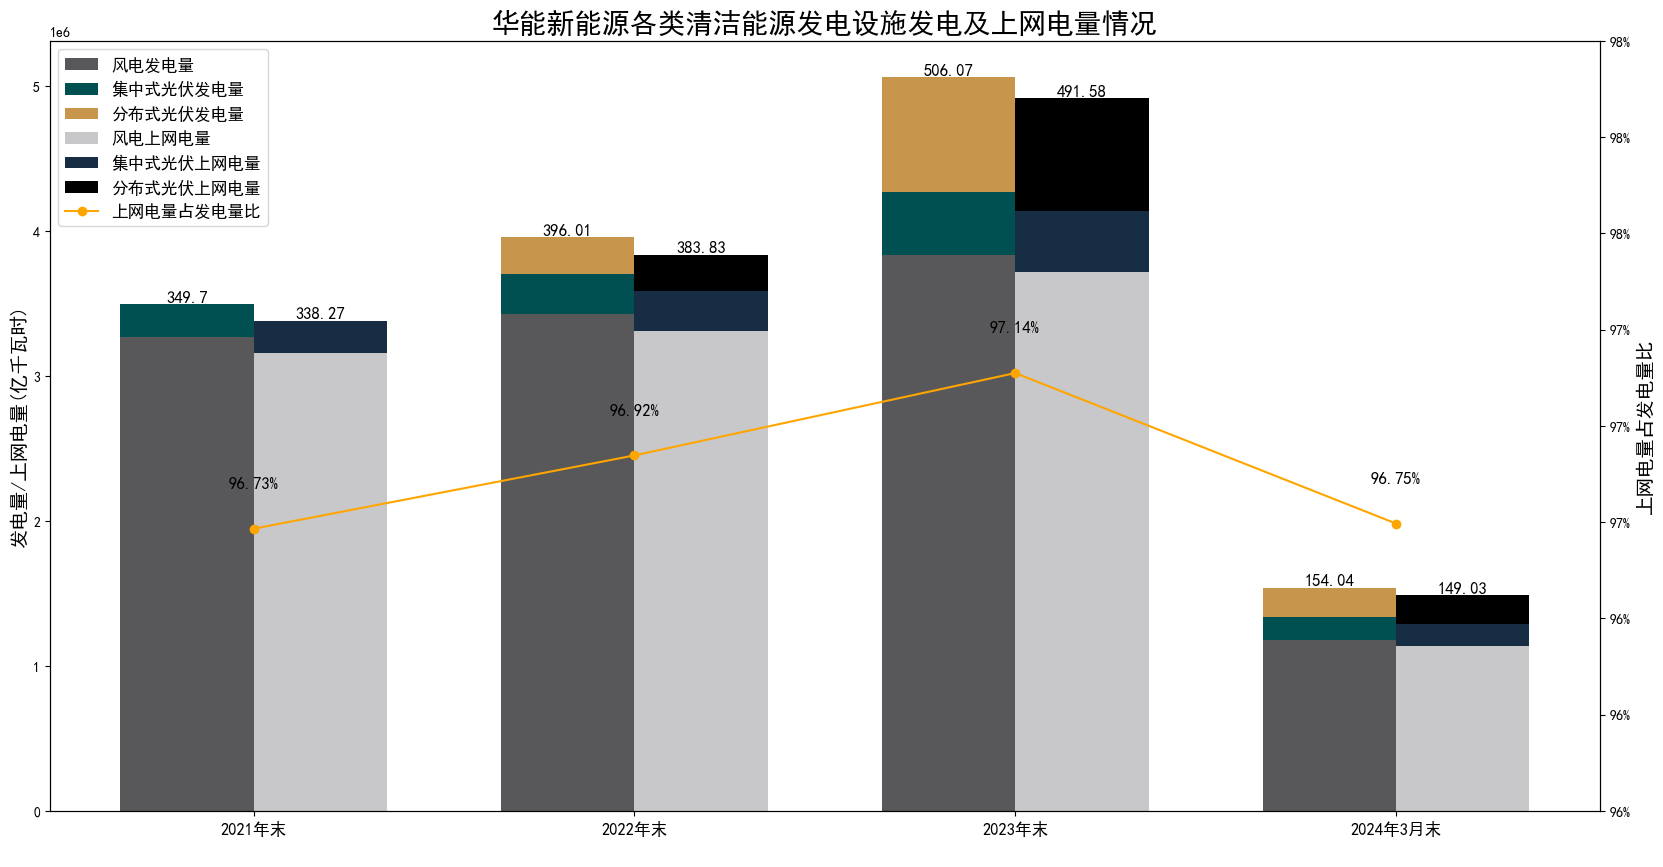

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['2021年末', '2022年末', '2023年末', '2024年3月末']
values1_group1 = [3266992.62, 3428208.74, 3832641.19, 1179945.34] ##风电发电量
values2_group1 = [229860.33, 277420.71, 438961.78, 158019.15] ##集中式光伏发电量
values3_group1 = [123.36, 254479.05, 789080.69, 202481.15] ##分布式光伏发电量
values1_group2 = [3157643.35, 3313809.94, 3714953.16, 1134277.62] ##风电上网电量
values2_group2 = [224950.25, 270865.57, 427642.28, 154332.6] ##集中式光伏上网电量
values3_group2 = [123.15, 253583.75, 773201.43, 201710.92] ##分布式光伏上网电量
line_values = [0.967326184, 0.969230833, 0.971370115, 0.967461039] ##

# 颜色
colors = ['#58585A', '#004F51', '#C7954C', '#C8C8CA', '#172D44', '#000000']

# 创建图形和轴，设置图形宽度为20
fig, ax1 = plt.subplots(figsize=(20, 10))

# 计算每个柱子的位置
bar_width = 0.35
index = np.arange(len(categories))

# 绘制第一组堆积柱形图
bar1_group1 = ax1.bar(index - bar_width/2, values1_group1, bar_width, label='风电发电量', color=colors[0])
bar2_group1 = ax1.bar(index - bar_width/2, values2_group1, bar_width, bottom=values1_group1, label='集中式光伏发电量', color=colors[1])
bar3_group1 = ax1.bar(index - bar_width/2, values3_group1, bar_width, bottom=[sum(x) for x in zip(values1_group1, values2_group1)], label='分布式光伏发电量', color=colors[2])

# 显示第一组堆积柱形图的加总值（四舍五入到小数点后两位），字体大小为12
for i, (v1, v2, v3) in enumerate(zip(values1_group1, values2_group1, values3_group1)):
    total = v1 + v2 + v3
    ax1.text(index[i] - bar_width/2, total + 1, str(round(total/10000, 2)), ha='center', va='bottom', fontsize=12)

# 绘制第二组堆积柱形图
bar1_group2 = ax1.bar(index + bar_width/2, values1_group2, bar_width, label='风电上网电量', color=colors[3])
bar2_group2 = ax1.bar(index + bar_width/2, values2_group2, bar_width, bottom=values1_group2, label='集中式光伏上网电量', color=colors[4])
bar3_group2 = ax1.bar(index + bar_width/2, values3_group2, bar_width, bottom=[sum(x) for x in zip(values1_group2, values2_group2)], label='分布式光伏上网电量', color=colors[5])

# 显示第二组堆积柱形图的加总值（四舍五入到小数点后两位），字体大小为12
for i, (v1, v2, v3) in enumerate(zip(values1_group2, values2_group2, values3_group2)):
    total = v1 + v2 + v3
    ax1.text(index[i] + bar_width/2, total + 1, str(round(total/10000, 2)), ha='center', va='bottom', fontsize=12)

# 创建第二个纵轴
ax2 = ax1.twinx()

# 绘制折线图
line = ax2.plot(index, line_values, marker='o', color='orange', label='上网电量占发电量比')

# 显示折线图的百分比数值（四舍五入到小数点后两位），字体大小为12
for i, v in enumerate(line_values):
    ax2.text(index[i], v + 0.001, f'{v*100:.2f}%', ha='center', va='bottom', color='black', fontsize=12)

# 设置第二个纵轴的标签和刻度
ax2.set_ylabel('上网电量占发电量比', fontsize=14)
ax2.set_ylim(0.96, 0.98)
ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

# 添加标签和标题，字体大小为14
ax1.set_xlabel(' ', fontsize=14)
ax1.set_ylabel('发电量/上网电量(亿千瓦时)', fontsize=14)
ax1.set_title('华能新能源各类清洁能源发电设施发电及上网电量情况', fontsize=20)
ax1.set_xticks(index)
ax1.set_xticklabels(categories, fontsize=12)

# 合并图例，字体大小为12
bars, labels = ax1.get_legend_handles_labels()
lines, line_labels = ax2.get_legend_handles_labels()
ax1.legend(bars + lines, labels + line_labels, loc='upper left', fontsize=12)

# 显示图形
plt.show()